In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import random

HOMEWORK #1
(Создайте двумерный массив 10x3, заполненный случайными значениями. В каждой строке выберите значение, наиболее близкое к 0.5.)

In [17]:
B = np.random.random((10,3)) #создали массив
print("Массив:\n",B) #напечатали массив
A = B-0.5 #сделали вспомогательную матрицу, сдвинутую на 0.5
A = np.array([[math.fabs(A[i][j]) for j in range(3)] for i in range(10)])
C = np.array([B[i][np.argsort(A[i])[0]] for i in range(10)])
print("Ближайшие элементы к 0.5:\n",C)

Массив:
 [[0.9329379  0.93501534 0.23069817]
 [0.46083824 0.64137965 0.89961153]
 [0.48526334 0.48945692 0.40113533]
 [0.7754778  0.36502288 0.84743006]
 [0.57979948 0.22084792 0.21640053]
 [0.13417898 0.07441751 0.27975417]
 [0.37015193 0.44528971 0.6567355 ]
 [0.77471909 0.06638819 0.907332  ]
 [0.54109991 0.5460323  0.13729094]
 [0.11630335 0.39796165 0.0298061 ]]
Ближайшие элементы к 0.5:
 [0.23069817 0.46083824 0.48945692 0.36502288 0.57979948 0.27975417
 0.44528971 0.77471909 0.54109991 0.39796165]


HOMEWORK #2 (Создайте двумерный массив 6x6, заполненный случайными значениями. Затем сумму по каждой строке поделите на минимальный элемент из столбца с тем же индексом.)

In [13]:
A = np.random.random((6,6))
print("Массив:\n",A)
B = np.sum(A,axis=1)
C = np.min(A,axis=0)
print("Результат:\n",B/C)

Массив:
 [[0.30020899 0.2524069  0.21552872 0.38837169 0.11037516 0.2791209 ]
 [0.7131913  0.66020348 0.79482185 0.52726154 0.99608345 0.49145072]
 [0.8227565  0.1493293  0.75609078 0.08347533 0.08159895 0.76880471]
 [0.48451725 0.72156651 0.24096702 0.78725704 0.90018731 0.82788858]
 [0.75093166 0.04490351 0.98532482 0.55316272 0.36450158 0.50830163]
 [0.20403404 0.49400881 0.86212643 0.38065173 0.2311683  0.93739247]]
Результат:
 [ 7.57722758 93.15556787 12.35128023 47.46772083 39.30352105 11.13991024]


HOMEWORK #3 (На примере массива x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) найдите максимальный элемент в массиве среди элементов, перед которыми стоит ноль.)

In [5]:
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
y = [x[i+1] for i in range(len(x)-1) if x[i]==0]
print(np.sort(y)[len(y)-1])

5


HOMEWORK #4 (Пусть заданы два массива x = np.ones(10) и i = np.array([0, 1, 2, 3, 5, 5, 5, 8]). Прибавьте единицу к тем элементам массива x, индексы которых указаны в массиве i. В случае, если некоторый индекс встретился в массиве i несколько раз, прибавьте к соответствующему элементу массива x число вхождений данного индекса в массив i.)

In [23]:
x = np.ones(10)
i = np.array([0, 1, 2, 3, 5, 5, 5, 8])
ii = list(i)
x = np.array([x[j]+ii.count(j) for j in range(10)],dtype=int)
print(x)

[2 2 2 2 1 4 1 1 2 1]


HOMEWORK #5 (Написать функцию, реализующую алгоритм k-means. Входные и выходные значения функции должны быть аналогичны https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.cluster.vq.kmeans.html. Функция должна содержать не более двух циклов while (for).)

In [8]:
def kmeans(obs, k, itr, thresh):
    codebook_best = np.array([])
    distortion_best = 0.0
    
    for iter_num in range(itr):
        distortion = 0.0
        codebook = np.array([])
        
        randlist = random.sample(range(obs.shape[0]),k)
        codebook = np.array(obs[randlist][:])
        
        while(True):
            clusterids = np.empty(k,dtype = list)
            clusterids = [[] for i in range(k)]

            #Первый шаг: для каждого элемента ищем ближаший центроид, и записываем в clusterids

            sortarray = np.array([(obs[i]-codebook[j])**2 for i in range(obs.shape[0]) for j in range(k)]).reshape(obs.shape[0],k,2)
            #в ячейке [i][j] лежит квадрат разности точек obs[i] и codebook[j]
            verysortarray = np.sum(sortarray,axis=2)
            #суммируем по последней координате, получаем сумму квадратов разности по x и по y, то есть квадрат расстояния между точками
            #таким образом получили матрицу с попарными расстояниями между всеми точками и центроидами кластеров
            clusterids = [[i for i in range(obs.shape[0]) if j==np.argsort(verysortarray[i])[0]] for j in range(k)]
            #теперь просто в j-й кластер кладём те точки, для которых j-й центроид является ближайшим

            #Второй шаг: считаем новые координаты центроидов

            codebook = np.array([np.mean([obs[j] for j in clusterids[i]],axis=0) for i in range(k)])

            diffmatrice2 = np.array([(obs-codebook[i])**2 for i in range(k)])

            distmatrice = np.sum(diffmatrice2,axis=2) #матрица квадратов расстояний между точками и новыми кластерами

            cluster_distortion_array = np.array([np.sum(np.array([distmatrice[i][clusterids[i]]])) for i in range(k)])
            #в i-й ячейке лежит сумма квадратов расстояний от точек i-го кластера до соответствующего центроида

            if (math.fabs(distortion-np.sum(cluster_distortion_array)) < thresh):
                distortion = np.sum(cluster_distortion_array)
                break
                #если улучшение меньше thresh, то останавливаемся
            else:
                distortion = np.sum(cluster_distortion_array)
                #иначе просто перезаписываем distortion и продолжаем
                
        #Если получили лучший результат (ну или если только первая итерация), то записываем
        if iter_num==0:
            distortion_best = distortion
            codebook_best = np.array(codebook)
        elif distortion<distortion_best:
            distortion_best = distortion
            codebook_best = np.array(codebook)
    
    return [codebook_best,distortion_best]

HOMEWORK #6 (С помощью реализованной функции kmeans выделить кластеры клиентов в разрезах возраст-доход, возрвст-покупательский индекс, доход-покупательский индекс. В каждом случае использовать elbow method для определения оптимального числа кластеров. Визуализировать полученные кластеры (каждый кластер изобразить собственным цветом). Дать интерпретацию полученным кластерам.)

In [9]:
url = 'https://raw.githubusercontent.com/sharmaroshan/Clustering-of-Mall-Customers/master/Mall_Customers.csv'
data = np.loadtxt(url, delimiter=',', dtype=object, skiprows=1)
data[:, 1] = data[:, 1] == 'Male'
data = data.astype(float)

Итак, сначала разберём разрез возраст-доход

In [10]:
OBS = np.array([np.array([data[i][2],data[i][3]]) for i in range(data.shape[0])])

Посмотрим на показатель distortion при разбиении данных на k кластеров, когда k меняется от 2 до 7:

In [17]:
kmeans(OBS,2,50,0.1)[1]

87121.56591478697

In [18]:
kmeans(OBS,3,50,0.1)[1]

59486.961439280356

In [20]:
kmeans(OBS,4,50,0.1)[1]

39529.88796736351

In [21]:
kmeans(OBS,5,50,0.1)[1]

31659.353138717815

In [22]:
kmeans(OBS,6,50,0.1)[1]

25399.02200441698

In [23]:
kmeans(OBS,7,50,0.1)[1]

21917.19272406117

Видно, что elbow method подсказывает нам взять количество кластеров равным k=4

Напишем функцию для визуализации кластеризации:

In [30]:
def cute_pic(obs, k, itr, thresh):
    km = kmeans(obs,k,itr,thresh)
    codebook = np.array(km[0])
    
    sortarray = np.array([(obs[i]-codebook[j])**2 for i in range(obs.shape[0]) for j in range(k)]).reshape(obs.shape[0],k,2)
    verysortarray = np.sum(sortarray,axis=2)
    clusterids = [[i for i in range(obs.shape[0]) if j==np.argsort(verysortarray[i])[0]] for j in range(k)]
    
    colors = cm.rainbow(np.linspace(0,1,k))
    
    for i,c in zip(range(k),colors):
        cluster = np.array(obs[clusterids[i][:]])
        plt.scatter(*cluster.T, color = c)

Теперь используем её для создания картинки:

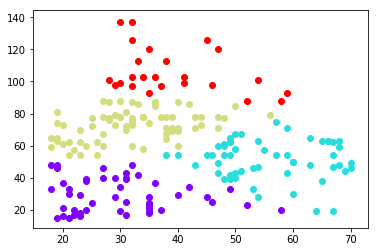

In [32]:
cute_pic(OBS,4,100,0.1)

Выделяются 4 группы покупателей: 1)Богатые (доход от 90 тыс.); 2)Молодые среднего достатка (возраст до 50, доход от 50 до 90 тыс.); 3)Пожилые (возраст от 45 лет); 4)Молодые бедные (возраст до 50 лет, доход до 50 тыс.)

Теперь посмотрим на данные в разрезе возраст-покупательский индекс:

In [35]:
OBS = np.array([np.array([data[i][2],data[i][4]]) for i in range(data.shape[0])])

Посмотрим на показатель distortion при разбиении данных на k кластеров, когда k меняется от 2 до 6:

In [36]:
kmeans(OBS,2,50,0.1)[1]

75949.15601023019

In [37]:
kmeans(OBS,3,50,0.1)[1]

45840.67661610867

In [39]:
kmeans(OBS,4,50,0.1)[1]

28165.58356662934

In [40]:
kmeans(OBS,5,50,0.1)[1]

23810.46223307137

In [44]:
kmeans(OBS,6,50,0.1)[1]

19489.643884468675

Кажется, руководствуясь elbow method, мы опять должны выбрать число кластеров, равное 4

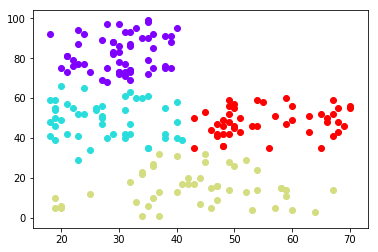

In [45]:
cute_pic(OBS,4,100,0.1)

Видим 4 чёткие группы людей: 1)Люди с высоким покупательским индексом; 2)Люди с низким покупательским индексом; 3)Люди со средним покупательским индексом до 45 лет; 4)Люди со средним покупательским индексом от 45 лет

Наконец, проанализируем покупателей в разрезе доход-покупательский индекс

In [48]:
OBS = np.array([np.array([data[i][3],data[i][4]]) for i in range(data.shape[0])])

Посмотрим на показатель distortion при разбиении данных на k кластеров, когда k меняется от 2 до 7:

In [49]:
kmeans(OBS,2,50,0.1)[1]

181363.59595959593

In [50]:
kmeans(OBS,3,50,0.1)[1]

106348.37306211118

In [51]:
kmeans(OBS,4,50,0.1)[1]

73679.78903948834

In [52]:
kmeans(OBS,5,50,0.1)[1]

44448.4554479337

In [53]:
kmeans(OBS,6,50,0.1)[1]

37233.814510710006

In [54]:
kmeans(OBS,7,50,0.1)[1]

30241.34361793658

Видим явный перелом при k=5, выбираем это число

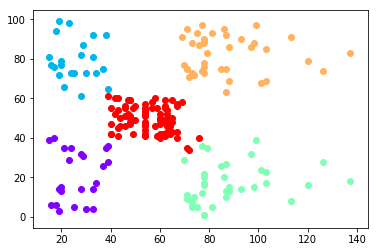

In [56]:
cute_pic(OBS,5,100,0.1)

5 кластеров: 1)Люди с низкими доходами и низким ПИ; 2)Люди с низкими доходами и высоким ПИ; 3)Люди со средними доходами и средним ПИ; 4)Люди с высокими доходами и низким ПИ; 5)Люди с высокими доходами и высоким ПИ